# LGBTQ+ Representation in Cartoons

Let's get gay, y'all

First, imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

## Shows

This data set actually has two CSV files; one for shows with queer characters, and one for specific characters from each show. First let's pull in show data.

In [2]:
shows = pd.DataFrame(pd.read_csv('./20220601-LGBTQ-cartoons-series-information-v3.csv'))
shows.head()

,ID,show_title,TV_rating,IMDB_total_votes,IMDB_rating,seasons,total_episodes,start_date,end_date,duration,network,genre
0,tt7736544,3Below: Tales of Arcadia,TV-Y7,5776,7.7,2,26,12/21/2018,7/12/2019,203,Netflix,"action, adventure, comedy, family, fantasy, sc..."
1,tt1305826,Adventure Time,TV-PG,86837,8.6,10,282,4/5/2010,7/20/2018,2839,Cartoon Network,"action, adventure, comedy, family, fantasy, sc..."
2,tt11165358,Adventure Time: Distant Lands,TV-PG,3322,8.7,1,4,6/25/2020,9/2/2021,434,HBO Max,"action, adventure, comedy, family, fantasy, sc..."
3,tt1790914,Allen Gregory,TV-14,3442,4.1,1,7,10/30/2011,12/18/2011,49,Fox,comedy
4,tt0397306,American Dad!,TV-14,123144,7.3,19,322,2/6/2005,NaN,6201,Fox,comedy


In [3]:
shows.columns

Index(['ID', 'show_title', 'TV_rating', 'IMDB_total_votes', 'IMDB_rating',
       'seasons', 'total_episodes', 'start_date', 'end_date', 'duration',
       'network', 'genre'],
      dtype='object')

Most of this data has been pulled from IMDB, and is relatively easy to read. 

`ID` refers to the unique ID given to each entry on IMDB. However, this is not entirely useful to us in this situation, so we will most likely end up dropping it. 

`show_title` is the name of the show.

`TV_rating` refers to the content rating given to each show in the little box at the top corner of each new episode (TV-G, TV-14, TV-PG, etc.).

`IMDB_total_votes` counts the number of ratings a program has received on IMDB.

`IMDB_rating` is the average user rating of a show on IMDB, on a scale from 1 to 10.

These ratings don't have much bearing on the shows themselves as far as representation goes, but they could be useful indicators on popularity and general reception.

`total_episodes` is the number of episodes that a show has aired.

`start_date` and `end_date` represent when a show began and ended. Some `end_date` values are null, indicating the show is still on going as of the creation of this dataset.

`duration` is the number of days a show was on the air (shows with a 0 are ongoing). Considering not all shows put out episodes at the same rate over the same time periods, and we already have `total_episodes`, `start_date` and `end_date`, this value is not as important to us.

`network` is the channel(s) or service(s) on which the show was originally broadcast.

`genre` includes the genre labels the show is listed under. Some shows will have multiple genres, others may only have one.

Now that we have that out of the way, let's rename our columns to be a little more readable before filtering out the data we don't need.

In [4]:
shows.columns = ['IMDB ID', 'Show', 'Rating', 'IMDB Votes', 'IMDB Rating', 'Seasons', 'Episodes', 'Premiere', 'Finale', 'Duration', 'Network', 'Genres']
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB ID      118 non-null    object 
 1   Show         118 non-null    object 
 2   Rating       118 non-null    object 
 3   IMDB Votes   118 non-null    int64  
 4   IMDB Rating  118 non-null    float64
 5   Seasons      118 non-null    int64  
 6   Episodes     118 non-null    int64  
 7   Premiere     118 non-null    object 
 8   Finale       86 non-null     object 
 9   Duration     118 non-null    int64  
 10  Network      118 non-null    object 
 11  Genres       118 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 11.2+ KB


In [5]:
shows = shows.set_index('Show').drop(['IMDB ID', 'Duration'], axis=1)
shows['Finale'] = shows['Finale'].fillna('Ongoing')
shows

,Rating,IMDB Votes,IMDB Rating,Seasons,Episodes,Premiere,Finale,Network,Genres
Show,,,,,,,,,
3Below: Tales of Arcadia,TV-Y7,5776,7.7,2,26,12/21/2018,7/12/2019,Netflix,"action, adventure, comedy, family, fantasy, sc..."
Adventure Time,TV-PG,86837,8.6,10,282,4/5/2010,7/20/2018,Cartoon Network,"action, adventure, comedy, family, fantasy, sc..."
Adventure Time: Distant Lands,TV-PG,3322,8.7,1,4,6/25/2020,9/2/2021,HBO Max,"action, adventure, comedy, family, fantasy, sc..."
Allen Gregory,TV-14,3442,4.1,1,7,10/30/2011,12/18/2011,Fox,comedy
American Dad!,TV-14,123144,7.3,19,322,2/6/2005,Ongoing,Fox,comedy
...,...,...,...,...,...,...,...,...,...
Twelve Forever,TV-Y7,643,6.4,1,25,7/29/2019,7/29/2019,Netflix,"action, adventure, comedy, family, fantasy"
Victor and Valentino,TV-Y7,663,6.2,3,94,3/30/2019,Ongoing,Cartoon Network,"adventure, comedy, family, fantasy, mystery, s..."
Voltron: Legendary Defender,TV-Y7,8504,8.0,8,78,6/10/2016,12/14/2018,Netflix,"action, adventure, comedy, drama, family, fant..."


---

In [6]:
characters = pd.read_csv('./20220601-LGBTQ-character-demographics-v3.csv')
characters.head()

,ID,show_title,confirmation_date,character_name,race,gender,orientation,role,representation
0,tt7736544,3Below: Tales of Arcadia,7/12/2019,Shannon Longhannon,White,Cis Woman,Lesbian,Recurring Character,Explicit
1,tt1305826,Adventure Time,5/17/2010,Princess Bubblegum,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
2,tt1305826,Adventure Time,4/5/2010,Marceline the Vampire Queen,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
3,tt1305826,Adventure Time,4/26/2010,BMO,NaN,Agender,Undetermined,Recurring Character,Explicit
4,tt11165358,Adventure Time: Distant Lands,6/25/2020,Y5,NaN,Cis Woman,Ambiguous,Recurring Character,Implicit


In [7]:
characters.columns

Index(['ID', 'show_title', 'confirmation_date', 'character_name', 'race',
       'gender', 'orientation', 'role', 'representation'],
      dtype='object')

In [8]:
characters.columns = ['IMDB ID', 'Show', 'Confirmation Date', 'Character', 'Race', 'Gender', 'Orientation', 'Role', 'Representation']

In [9]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IMDB ID            353 non-null    object
 1   Show               353 non-null    object
 2   Confirmation Date  353 non-null    object
 3   Character          353 non-null    object
 4   Race               237 non-null    object
 5   Gender             353 non-null    object
 6   Orientation        353 non-null    object
 7   Role               353 non-null    object
 8   Representation     353 non-null    object
dtypes: object(9)
memory usage: 24.9+ KB


In [10]:
characters = characters.set_index('Character').drop(['IMDB ID'], axis=1)
characters['Race'].fillna('N/a')
characters

,Show,Confirmation Date,Race,Gender,Orientation,Role,Representation
Character,,,,,,,
Shannon Longhannon,3Below: Tales of Arcadia,7/12/2019,White,Cis Woman,Lesbian,Recurring Character,Explicit
Princess Bubblegum,Adventure Time,5/17/2010,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
Marceline the Vampire Queen,Adventure Time,4/5/2010,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
BMO,Adventure Time,4/26/2010,NaN,Agender,Undetermined,Recurring Character,Explicit
Y5,Adventure Time: Distant Lands,6/25/2020,NaN,Cis Woman,Ambiguous,Recurring Character,Implicit
...,...,...,...,...,...,...,...
Bart Allen,Young Justice,6/2/2012,White,Cis Man,Gay,Recurring Character,Explicit
Ed Dorado Jr.,Young Justice,5/26/2012,POC,Cis Man,Gay,Recurring Character,Implicit
Marie Logan,Young Justice,11/26/2010,White,Cis Woman,Lesbian,Guest Character,Implicit


In [11]:
character_count = pd.DataFrame(characters[['Show']].value_counts().sort_index(ascending = True))
character_count

,0
Show,
3Below: Tales of Arcadia,1
Adventure Time,3
Adventure Time: Distant Lands,1
Allen Gregory,2
American Dad!,3
...,...
Victor and Valentino,1
Voltron: Legendary Defender,3
W.I.T.C.H.,3


In [12]:
shows = pd.merge(shows, character_count, on="Show")

In [13]:
shows.rename(columns = {0: 'LGBT Characters'},
            inplace = True)

In [14]:
showNames = shows.index.values
characterCount = shows['LGBT Characters']

Here we graph out each show, and how many queer characters are present

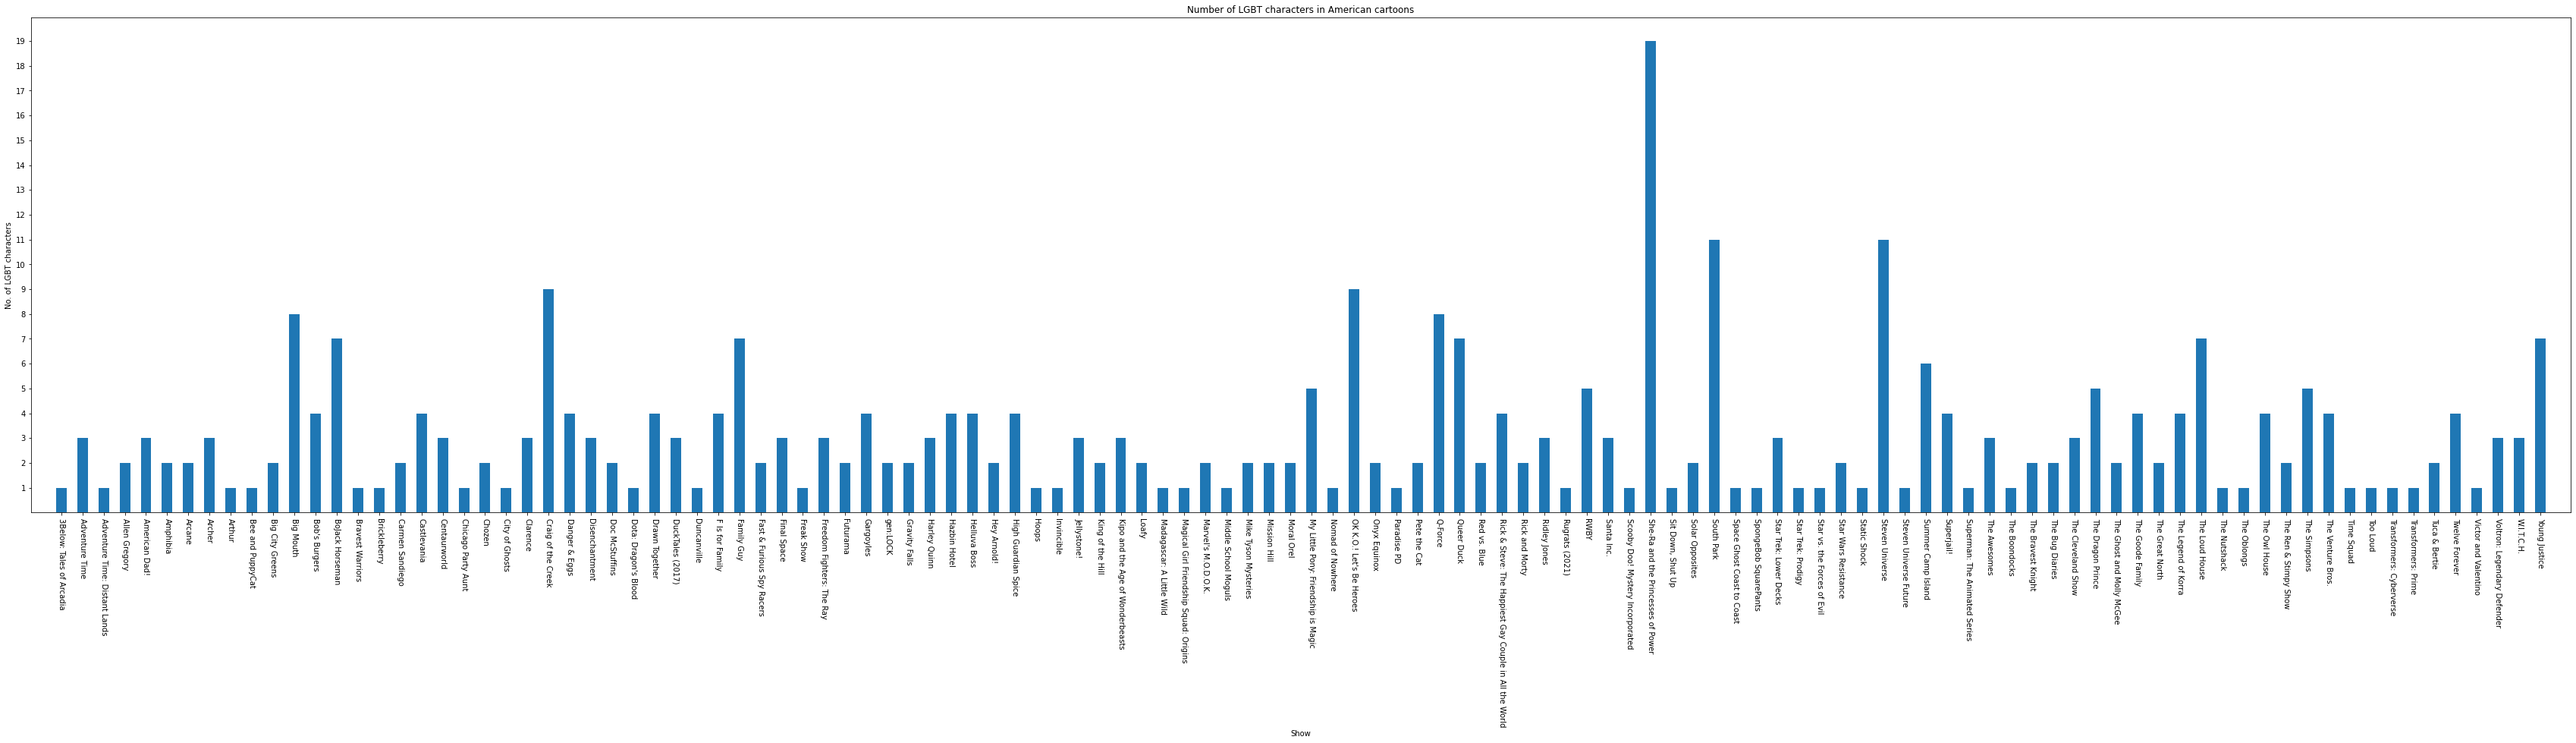

In [15]:
plt.figure(figsize=(60,12))
plt.bar(showNames, characterCount, width = 0.5)

plt.xlabel("Show")
plt.xticks(rotation=-90)
plt.margins(x=0.01)
plt.ylabel("No. of LGBT characters")
plt.yticks(range(min(characterCount), max(characterCount + 1), 1))
plt.title("Number of LGBT characters in American cartoons")
plt.show()

In [32]:
topTen_characters = pd.DataFrame(shows).sort_values(by = ['LGBT Characters'], ascending = False)[:10]

In [30]:
topTen_characters.drop(topTen_characters.iloc[:, 0:8], inplace = True, axis = 1)

In [31]:
topTen_characters

,Genres,LGBT Characters
Show,,
She-Ra and the Princesses of Power,"action, adventure, comedy, drama, family, fant...",19
Steven Universe,"action, adventure, comedy, drama, family, fant...",11
South Park,comedy,11
Craig of the Creek,"adventure, comedy, drama, family",9
OK K.O.! Let's Be Heroes,"action, adventure, comedy, family, fantasy, sc...",9
...,...,...
Steven Universe Future,"action, adventure, comedy, drama, family, fant...",1
Madagascar: A Little Wild,"adventure, comedy, family, musical",1
Superman: The Animated Series,"action, adventure, drama, family, science fiction",1
